### Import libraries

In [2]:
import os

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cross_decomposition import PLSRegression
from sklearn.linear_model import LinearRegression

In [3]:
os.listdir('data')

['Audit_test_.csv', 'Audit_train_.csv', 'Audit_unknown_.csv']

In [4]:
data_train = pd.read_csv('data/Audit_train_.csv', index_col=0)
data_test = pd.read_csv('data/Audit_test_.csv', index_col=0)
data_unknown = pd.read_csv('data/Audit_unknown_.csv', index_col=0)

### Data exploration

In [5]:
data_train.head()

,Sector_score,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,Score_B.1,...,PROB,RiSk_E,History,Prob,Risk_F,Score,Inherent_Risk,CONTROL_RISK,Detection_Risk,Audit_Risk
0,3.89,1.99,0.4,0.796,10.24,0.6,6.144,12.23,5.0,0.2,...,0.2,0.4,0,0.2,0.0,3.8,20.808,0.4,0.5,4.1616
1,2.37,1.86,0.4,0.744,4.51,0.6,2.706,6.37,5.0,0.2,...,0.2,0.4,0,0.2,0.0,3.6,7.758,0.4,0.5,1.5516
2,55.57,0.70,0.2,0.140,0.79,0.2,0.158,1.49,5.5,0.4,...,0.2,0.4,0,0.2,0.0,2.4,3.280,0.4,0.5,0.6560
3,55.57,0.00,0.2,0.000,0.00,0.2,0.000,0.00,5.0,0.2,...,0.2,0.4,0,0.2,0.0,2.0,1.404,0.4,0.5,0.2808
4,21.61,0.29,0.2,0.058,0.33,0.2,0.066,0.62,5.0,0.2,...,0.2,0.4,0,0.2,0.0,2.0,1.524,0.4,0.5,0.3048


In [6]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 201 entries, 0 to 200
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sector_score    201 non-null    float64
 1   PARA_A          201 non-null    float64
 2   Score_A         201 non-null    float64
 3   Risk_A          201 non-null    float64
 4   PARA_B          201 non-null    float64
 5   Score_B         201 non-null    float64
 6   Risk_B          201 non-null    float64
 7   TOTAL           201 non-null    float64
 8   numbers         201 non-null    float64
 9   Score_B.1       201 non-null    float64
 10  Risk_C          201 non-null    float64
 11  Money_Value     201 non-null    float64
 12  Score_MV        201 non-null    float64
 13  Risk_D          201 non-null    float64
 14  District_Loss   201 non-null    int64  
 15  PROB            201 non-null    float64
 16  RiSk_E          201 non-null    float64
 17  History         201 non-null    int64  


In [11]:
data_train.columns

Index(['Sector_score', 'PARA_A', 'Score_A', 'Risk_A', 'PARA_B', 'Score_B',
       'Risk_B', 'TOTAL', 'numbers', 'Score_B.1', 'Risk_C', 'Money_Value',
       'Score_MV', 'Risk_D', 'District_Loss', 'PROB', 'RiSk_E', 'History',
       'Prob', 'Risk_F', 'Score', 'Inherent_Risk', 'CONTROL_RISK',
       'Detection_Risk', 'Audit_Risk'],
      dtype='object')

In [ ]:
# All variable look like they are numerical.
# Detection_Risk is a constant, so we can drop it.

# There are many variables that look like they are skewed.
# Some of them have a lot of outliers.

In [ ]:
# Check distribution on Y
# If Y is not normally distributed, we can try to remove outliers from X
# transform variables to make them more nornally disributed
# standarize variables
# Check pearson correlation between variables

In [12]:
data_train.columns

Index(['Sector_score', 'PARA_A', 'Score_A', 'Risk_A', 'PARA_B', 'Score_B',
       'Risk_B', 'TOTAL', 'numbers', 'Score_B.1', 'Risk_C', 'Money_Value',
       'Score_MV', 'Risk_D', 'District_Loss', 'PROB', 'RiSk_E', 'History',
       'Prob', 'Risk_F', 'Score', 'Inherent_Risk', 'CONTROL_RISK',
       'Detection_Risk', 'Audit_Risk'],
      dtype='object')

In [43]:
data_test.query("Audit_Risk > 60")

,Sector_score,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,Score_B.1,...,PROB,RiSk_E,History,Prob,Risk_F,Score,Inherent_Risk,CONTROL_RISK,Detection_Risk,Audit_Risk
235,2.37,17.53,0.6,10.518,0.00,0.2,0.000,17.53,6.5,0.6,...,0.2,1.2,4,0.6,2.4,4.4,74.868,3.6,0.5,134.7624
254,15.56,20.65,0.6,12.390,0.00,0.2,0.000,0.00,6.0,0.6,...,0.2,1.2,1,0.4,0.4,4.2,255.976,1.6,0.5,204.7808
283,3.89,10.00,0.6,6.000,74.26,0.6,44.556,84.26,5.5,0.4,...,0.2,0.4,3,0.6,1.8,4.8,61.652,2.2,0.5,67.8172
293,3.89,71.48,0.6,42.888,25.63,0.6,15.378,97.11,5.0,0.2,...,0.2,0.4,0,0.2,0.0,4.0,583.688,0.4,0.5,116.7376


In [42]:
data_train.query("Audit_Risk > 60")

,Sector_score,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,Score_B.1,...,PROB,RiSk_E,History,Prob,Risk_F,Score,Inherent_Risk,CONTROL_RISK,Detection_Risk,Audit_Risk
62,3.89,7.97,0.6,4.782,17.18,0.6,10.308,25.15,5.0,0.2,...,0.2,0.4,0,0.2,0.0,4.0,577.508,0.4,0.5,115.5016
78,2.72,4.28,0.6,2.568,1264.63,0.6,758.778,1268.91,5.5,0.4,...,0.2,1.2,2,0.6,1.2,5.2,801.262,2.4,0.5,961.5144
179,1.99,57.03,0.6,34.218,134.33,0.6,80.598,191.36,5.0,0.2,...,0.2,0.4,0,0.2,0.0,4.0,622.838,0.4,0.5,124.5676


In [55]:
data_test.query("Inherent_Risk > 500")

,Sector_score,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,Score_B.1,...,PROB,RiSk_E,History,Prob,Risk_F,Score,Inherent_Risk,CONTROL_RISK,Detection_Risk,Audit_Risk
293,3.89,71.48,0.6,42.888,25.63,0.6,15.378,97.11,5.0,0.2,...,0.2,0.4,0,0.2,0.0,4.0,583.688,0.4,0.5,116.7376


In [29]:
from scipy.stats import zscore

In [40]:
# get the z-score of Audit_Risk for each row in the dataframe
data_train[['Audit_Risk']].pipe(zscore).abs().query('Audit_Risk > 2')

,Audit_Risk
78,13.825934


In [39]:
data_test[['Audit_Risk']].pipe(zscore).abs().query('Audit_Risk > 3')

,Audit_Risk
235,4.561281
254,7.092847
293,3.909582


In [89]:
data_train.query("Audit_Risk > 60")

,Sector_score,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,Score_B.1,...,PROB,RiSk_E,History,Prob,Risk_F,Score,Inherent_Risk,CONTROL_RISK,Detection_Risk,Audit_Risk
62,3.89,7.97,0.6,4.782,17.18,0.6,10.308,25.15,5.0,0.2,...,0.2,0.4,0,0.2,0.0,4.0,577.508,0.4,0.5,115.5016
78,2.72,4.28,0.6,2.568,1264.63,0.6,758.778,1268.91,5.5,0.4,...,0.2,1.2,2,0.6,1.2,5.2,801.262,2.4,0.5,961.5144
179,1.99,57.03,0.6,34.218,134.33,0.6,80.598,191.36,5.0,0.2,...,0.2,0.4,0,0.2,0.0,4.0,622.838,0.4,0.5,124.5676


### Try to predict far outliers

In [302]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [303]:
# columns = ["PARA_B", "Inherent_Risk", "Audit_Risk"]
# columns = ["Inherent_Risk", "Audit_Risk"]
# columns = ["PARA_B", "Audit_Risk"]
columns = ["PARA_B", "Risk_B", "TOTAL", "Prob", "Inherent_Risk", "Audit_Risk"]

In [445]:
data_train_clean = (
    data_train
    [columns]
    .query('Audit_Risk < 60')
    # .assign(PARAB_2 = lambda x: x['PARA_B']**2)
    # .apply(np.log1p)
    .assign(
        PARA_B = lambda x: x['PARA_B'].apply(np.log1p),
        Inherent_Risk = lambda x: x['Inherent_Risk'].apply(np.log1p),
        # Audit_Risk = lambda x: x['Audit_Risk'].apply(np.log),
    )

)
data_test_clean = (
    data_test
    [columns]
    .query('Audit_Risk < 60')
    # .assign(PARAB_2 = lambda x: x['PARA_B']**2)
    # .apply(np.log1p)
    .assign(
        PARA_B = lambda x: x['PARA_B'].apply(np.log1p),
        Inherent_Risk = lambda x: x['Inherent_Risk'].apply(np.log1p),
        # Audit_Risk = lambda x: x['Audit_Risk'].apply(np.log),
    )
)

In [454]:
# create a function to scale the data. As input it takes the training data, the test data and the columns to scale
def scale_data(train, test, columns):
    # create a scaler object
    scaler = StandardScaler()
    # fit the scaler to the training data
    if not isinstance(columns, list):
        columns = [columns]
    # transform both the train and the test data
    train_scaled = train.copy()
    test_scaled = test.copy()
    for col in columns:
        train_scaled[col] = scaler.fit_transform(train[[col]])
        test_scaled[col] = scaler.transform(test[[col]])
    return train_scaled, test_scaled

In [455]:
# data_train_clean, data_test_clean = scale_data(data_train_clean, data_test_clean, ["PARA_B", "Inherent_Risk"])

In [456]:
data_train_clean.corr().abs().style.background_gradient(cmap='coolwarm')

,PARA_B,Inherent_Risk,Audit_Risk
PARA_B,1.000000,0.867016,0.631105
Inherent_Risk,0.867016,1.000000,0.776949
Audit_Risk,0.631105,0.776949,1.000000


In [449]:
# data_unknown.Audit_Risk.min()

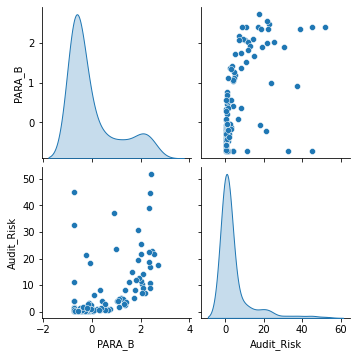

In [457]:
sns.pairplot(data_train_clean, vars=['PARA_B', 'Audit_Risk'], diag_kind='kde');

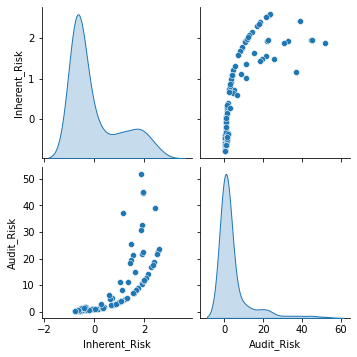

In [458]:
sns.pairplot(data_train_clean, vars=['Inherent_Risk', 'Audit_Risk'], diag_kind='kde');

In [459]:
data_test_clean.min()

PARA_B          -0.727559
Inherent_Risk   -0.791471
Audit_Risk       0.280000
dtype: float64

In [460]:
data_train_clean.min()

PARA_B          -0.727559
Inherent_Risk   -0.791471
Audit_Risk       0.280000
dtype: float64

In [461]:
model_rl = (
    LinearRegression()
    .fit(
        data_train_clean.drop("Audit_Risk", axis=1),
        data_train_clean['Audit_Risk']
    )
    # .score(
    #     data_test_clean.drop("Audit_Risk", axis=1),
    #     data_test_clean['Audit_Risk']
    # )
)

y_pred = model_rl.predict(data_test_clean.drop("Audit_Risk", axis=1))

y_pred = np.exp(y_pred) - 1

plt.plot(y_pred, y_pred - data_test_clean['Audit_Risk'], 'o')
# plt.plot(y_pred, data_test_clean['Audit_Risk'], 'o')

# rmse
np.sqrt(np.mean((y_pred - data_test_clean['Audit_Risk'])**2))
#r2
1 - np.sum((y_pred - data_test_clean['Audit_Risk'])**2) / np.sum((data_test_clean['Audit_Risk'] - data_test_clean['Audit_Risk'].mean())**2)

# model_rl.score(data_test_clean.drop('Audit_Risk', axis=1), data_test_clean['Audit_Risk'])

0.791831153743922

In [371]:
# data_train_clean = data_train[columns].assign(long = np.where(data_train['Audit_Risk'] > 60, 1, 0)).drop("Audit_Risk", axis=1)
# data_test_clean = data_test[columns].assign(long = np.where(data_test['Audit_Risk'] > 60, 1, 0)).drop("Audit_Risk", axis=1)

In [372]:
# model_lr = LogisticRegression(max_iter=1000).fit(data_train_clean.drop(['long'], axis=1), data_train_clean.long)

# y_pred = model_lr.predict(data_test_clean.drop(['long'], axis=1))

# from sklearn.metrics import confusion_matrix

# confusion_matrix(data_test_clean.long, y_pred)

In [115]:
data_test_clean.assign(y_pred = y_pred).query("y_pred == 1")

,PARA_B,Inherent_Risk,long,y_pred
293,25.63,583.688,1,1


In [ ]:
data_train.corr().abs().sort_values('Audit_Risk', ascending=False).style.background_gradient(cmap='coolwarm')

In [462]:
# columns = ["PARA_B", "Inherent_Risk", "Audit_Risk"]
# columns = ["PARA_B", "Risk_B", "TOTAL", "Prob", "Inherent_Risk", "Audit_Risk"]

### PLS

In [785]:
# create a function to scale the data. As input it takes the training data, the test data and the columns to scale
def scale_data(train, test, unknown, columns):
    # create a scaler object
    scaler = StandardScaler()
    # fit the scaler to the training data
    if not isinstance(columns, list):
        columns = [columns]
    # transform both the train and the test data
    train_scaled = train.copy()
    test_scaled = test.copy()
    unknown_scaled = unknown.copy()
    for col in columns:
        train_scaled[col] = scaler.fit_transform(train[[col]])
        test_scaled[col] = scaler.transform(test[[col]])
        unknown_scaled[col] = scaler.transform(unknown[[col]])
    return train_scaled, test_scaled, unknown_scaled

In [786]:
columns = [
           "PARA_B", 
           "Inherent_Risk", 
           "Audit_Risk"
           ]
columns_nw = ["PARA_B", "Inherent_Risk"]

In [804]:
data_train_clean = (
    data_train
    [columns]
    .query('Audit_Risk < 60')
    # .assign(PARAB_2 = lambda x: x['PARA_B']**2)
    .apply(np.log1p)
    # .assign(
        # PARA_B = lambda x: x['PARA_B'].apply(np.log1p),
        # Inherent_Risk = lambda x: x['Inherent_Risk'].apply(np.log1p),
        # Audit_Risk = lambda x: x['Audit_Risk'].apply(np.log),
    # )

)
data_test_clean = (
    data_test
    [columns]
    .query('Audit_Risk < 60')
    # .assign(PARAB_2 = lambda x: x['PARA_B']**2)
    # .apply(np.log1p)
    .assign(
        # Risk_B = lambda x: x['Risk_B'].apply(np.log1p),
        # TOTAL = lambda x: x['TOTAL'].apply(np.log1p),
        # Prob = lambda x: x['Prob'].apply(np.log1p),
        PARA_B = lambda x: x['PARA_B'].apply(np.log1p),
        Inherent_Risk = lambda x: x['Inherent_Risk'].apply(np.log1p),
        # Audit_Risk = lambda x: x['Audit_Risk'].apply(np.log),
    )
)

data_unknown_clean = (
    data_unknown
    [columns_nw]
    .assign(
        PARA_B = lambda x: x['PARA_B'].apply(np.log1p),
        Inherent_Risk = lambda x: x['Inherent_Risk'].apply(np.log1p),
    )
)

In [805]:
data_train_clean_2, data_test_clean_2, data_unknown_clean_2 = scale_data(
    data_train_clean, data_test_clean, data_unknown_clean,
    [
        "PARA_B", 
        # "Risk_B", 
        # "TOTAL", 
        # "Prob", 
        "Inherent_Risk"
    ]
)

In [806]:
data_train_clean.max()

PARA_B           2.733230
Inherent_Risk    2.595409
Audit_Risk       3.970518
dtype: float64

In [807]:
data_test_clean.max()

PARA_B            2.677822
Inherent_Risk     2.629292
Audit_Risk       34.929600
dtype: float64

In [809]:
data_unknown_clean_2.max()

PARA_B           2.719978
Inherent_Risk    2.192701
dtype: float64

3.0930578746823585
0.8212540914981729


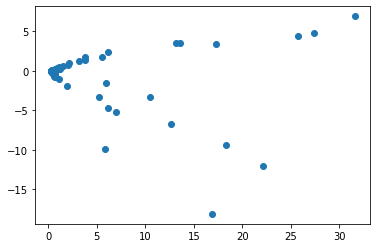

In [810]:
model_pls = (
    PLSRegression(n_components=2)
    .fit(
        data_train_clean.drop("Audit_Risk", axis=1),
        data_train_clean['Audit_Risk']
    )
)

X_twisted = model_pls.transform(data_test_clean.drop("Audit_Risk", axis=1))
X_twisted_train = model_pls.transform(data_train_clean.drop("Audit_Risk", axis=1))

y_pred = model_pls.predict(data_test_clean.drop("Audit_Risk", axis=1)).flatten()


y_pred = np.exp(y_pred) - 1

plt.plot(y_pred, y_pred - data_test_clean['Audit_Risk'], 'o')

# rmse
print(np.sqrt(np.mean((y_pred - data_test_clean['Audit_Risk'])**2))
)
# r2
print(1 - np.sum((y_pred - data_test_clean['Audit_Risk'])**2) / np.sum((data_test_clean['Audit_Risk'] - data_test_clean['Audit_Risk'].mean())**2))

# model_pls.score(data_test_clean.drop('Audit_Risk', axis=1), data_test_clean['Audit_Risk'])

### New prediction

In [811]:
y_predict_new = model_pls.predict(data_unknown_clean_2).flatten()

y_predict_new = np.exp(y_predict_new) - 1

array([[<Axes: title={'center': 'PARA_B'}>,
        <Axes: title={'center': 'Inherent_Risk'}>],
       [<Axes: title={'center': 'Audit_Risk'}>, <Axes: >]], dtype=object)

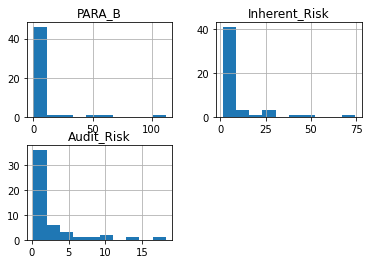

In [839]:
data_unknown.assign(Audit_Risk = y_predict_new)[columns].hist()

In [843]:
# get an interactive 3d plot. Plotly express
import plotly.express as px

data_s_n = data_unknown.assign(Audit_Risk = y_predict_new)[columns]

fig = px.scatter_3d(data_s_n, x='PARA_B', y='Inherent_Risk', z='Audit_Risk', color='Audit_Risk')
fig.show()

In [845]:
data_s_t = data_train[columns].query('Audit_Risk < 60')

fig = px.scatter_3d(data_s_t, x='PARA_B', y='Inherent_Risk', z='Audit_Risk', color='Audit_Risk')
fig.show()

array([[<Axes: title={'center': 'PARA_B'}>,
        <Axes: title={'center': 'Inherent_Risk'}>],
       [<Axes: title={'center': 'Audit_Risk'}>, <Axes: >]], dtype=object)

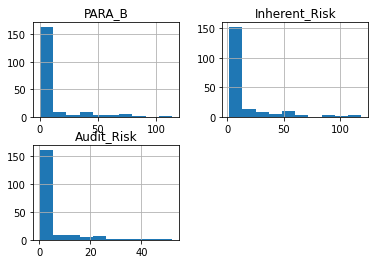

In [834]:
data_train[columns].query("Audit_Risk < 60").hist()

<Axes: xlabel='Inherent_Risk', ylabel='Audit_Risk'>

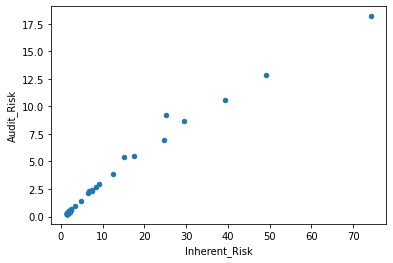

In [819]:
data_unknown.assign(Audit_Risk = y_predict_new).plot(x='Inherent_Risk', y='Audit_Risk', kind='scatter')

<Axes: xlabel='PARA_B', ylabel='Audit_Risk'>

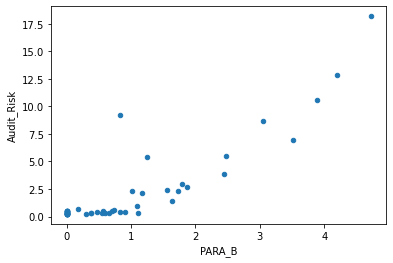

In [820]:
data_unknown_clean.assign(Audit_Risk = y_predict_new).plot(x='PARA_B', y='Audit_Risk', kind='scatter')

<Axes: xlabel='Inherent_Risk', ylabel='Audit_Risk'>

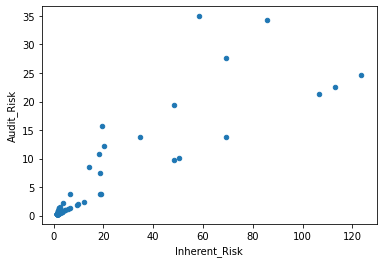

In [824]:
data_test[columns].query('Audit_Risk < 60').plot(x='Inherent_Risk', y='Audit_Risk', kind='scatter')

<Axes: xlabel='PARA_B', ylabel='Audit_Risk'>

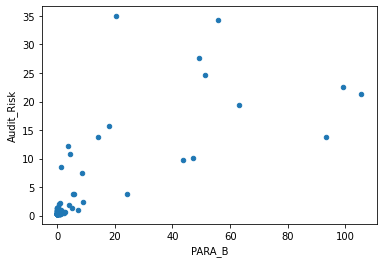

In [826]:
data_test[columns].query('Audit_Risk < 60').plot(x='PARA_B', y='Audit_Risk', kind='scatter')

<Axes: xlabel='Inherent_Risk', ylabel='Audit_Risk'>

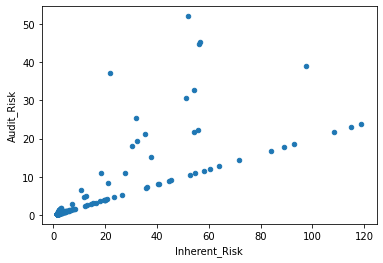

In [821]:
data_train[columns].query('Audit_Risk < 60').plot(x='Inherent_Risk', y='Audit_Risk', kind='scatter')

<Axes: xlabel='PARA_B', ylabel='Audit_Risk'>

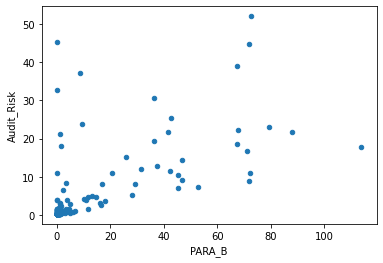

In [822]:
data_train[columns].query('Audit_Risk < 60').plot(x='PARA_B', y='Audit_Risk', kind='scatter')

In [847]:
data_train[columns].query('Audit_Risk < 60').to_csv('Audit_unknown.csv', index=False)

### Else

In [770]:
# columns_ = columns.copy()
# columns_.remove('Audit_Risk')
columns_ = [f"PLS{n+1}" for n in range(2)]

In [766]:
data_test_clean.Audit_Risk.shape

(97,)

In [767]:
X_twisted.shape

(97, 2)

In [768]:
data_train_clean.assign(Audit_Risk = data_train['Audit_Risk']).corr().abs().sort_values('Audit_Risk', ascending=False).style.background_gradient(cmap='coolwarm')

,PARA_B,Inherent_Risk,Audit_Risk
Audit_Risk,0.631105,0.776949,1.000000
Inherent_Risk,0.867016,1.000000,0.776949
PARA_B,1.000000,0.867016,0.631105


In [771]:
pd.DataFrame(X_twisted_train, columns=columns_).assign(Audit_Risk = data_train_clean['Audit_Risk']).corr().abs().style.background_gradient(cmap='coolwarm')

,PLS1,PLS2,Audit_Risk
PLS1,1.000000,0.000000,0.292095
PLS2,0.000000,1.000000,0.067168
Audit_Risk,0.292095,0.067168,1.000000


In [772]:
pd.DataFrame(X_twisted, columns=columns_).assign(Audit_Risk = data_test_clean.Audit_Risk.values).corr().abs().style.background_gradient(cmap='coolwarm')

,PLS1,PLS2,Audit_Risk
PLS1,1.000000,0.029937,0.871990
PLS2,0.029937,1.000000,0.154574
Audit_Risk,0.871990,0.154574,1.000000


In [773]:
data_train_clean.corr().abs().style.background_gradient(cmap='coolwarm')

,PARA_B,Inherent_Risk,Audit_Risk
PARA_B,1.000000,0.867016,0.797375
Inherent_Risk,0.867016,1.000000,0.954371
Audit_Risk,0.797375,0.954371,1.000000


In [555]:
# y_pred.flatten()